In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import boris_extraction as boris
import multirecording_spikeanalysis as spike

In [38]:
#open boris excel

# Full path example
file_path = r'C:\Users\anate\BORISfiles\24_nov_BORIS_real.tsv'

# Load TSV file
boris_df = pd.read_csv(file_path, sep='\t')

#df = data frame, in r it's called a tible, it's a 2D array vector, an excel sheet in code. It comes with specific formatting with column names and whatnot
#

boris_df

boris_df['Subject'].unique()

#note, if you click enter after above, it will print the data frame. It only prints df if they are the last line before being run

array(['social_agent', 'subject'], dtype=object)

In [62]:
subjects = ['subject', 'social_agent']
justSub = ['subject']
justSA = ['social_agent']
faceSniff = ['facial sniffing']
allSniff = ['facial sniffing', 'anogenital sniffing']
allogroom = ['allogrooming']

allSniffBoutsSub = boris.get_behavior_bouts(boris_df, justSub, allSniff, 1, 0.5)
allSniffBoutsSA = boris.get_behavior_bouts(boris_df, justSA, allSniff, 1, 0.5)
allSniffBouts = boris.get_behavior_bouts(boris_df, subjects, allSniff, 1, 0.5)

#this is an array of all sniff bouts

allogroomBouts = boris.get_behavior_bouts(boris_df, subjects, allogroom, 1, 0.5)

print(allSniffBoutsSub.shape)
allogroomBouts.shape
allSniffBoutsSub




(39, 2)


array([[ 606267.,  610133.],
       [ 612267.,  616067.],
       [ 618267.,  623200.],
       [ 625400.,  627000.],
       [ 628133.,  632800.],
       [ 661667.,  663400.],
       [ 688133.,  692200.],
       [ 752200.,  765933.],
       [ 777467.,  781400.],
       [ 966067.,  969267.],
       [ 972733.,  973467.],
       [ 976000.,  977467.],
       [ 984667.,  987866.],
       [1014267., 1019667.],
       [1045933., 1047533.],
       [1119000., 1120867.],
       [1325800., 1327533.],
       [1338800., 1341867.],
       [1343533., 1344400.],
       [1349333., 1350933.],
       [1352533., 1353333.],
       [1355067., 1356667.],
       [1403467., 1404133.],
       [1684267., 1685867.],
       [1689333., 1692467.],
       [1696733., 1698200.],
       [1700533., 1701467.],
       [1703867., 1704600.],
       [1776000., 1776733.],
       [2046267., 2049133.],
       [2050533., 2055867.],
       [2058200., 2060800.],
       [2062067., 2065533.],
       [2070867., 2072532.],
       [207466

In [88]:
#get start and stop times

transitionTimes = ['mice back in', 'mice taken out']
takenOut = ['mice taken out']

putInTimes = boris.get_behavior_bouts(boris_df, subjects, transitionTimes, 0, 0)

print(putInTimes)
exp1StartTime = putInTimes[0][1]
exp1EndTime = putInTimes[1][1]
exp2StartTime = putInTimes[2][1]
exp2EndTime = putInTimes[3][1]
exp3StartTime = putInTimes[4][1]
exp3EndTime = putInTimes[5][1]
exp4StartTime = putInTimes[6][1]
exp4EndTime = putInTimes[7][1]
exp5StartTime = putInTimes[8][1]

exp1StartTime

[[ 602600.  602600.]
 [ 900000.  900000.]
 [ 962400.  962400.]
 [1261133. 1261133.]
 [1323200. 1323200.]
 [1620200. 1620200.]
 [1681800. 1681800.]
 [1980533. 1980533.]
 [2044600. 2044600.]]


602600.0

In [ ]:
#note the above array is in, out, in, out, etc etc. make an in array
#I want to check if sniffing spikes of all bout types are similar 
# 
#okay new plan, more simple task, but I want to compare if neuron activity after any sniff is greater compared to baseline between exp 1 or 4 or exp1 or 5
# okay so sniff_exp1 : [start, stop] ..... [start, stop] (n times)
# then same for sniff_exp4 and sniff_exp5   


#NEVER ITERATE THROUGH A DF, USE THE FILTER. Can intereate through numpy array of behaviors generated earlier, save it into list.append
#make a loop that iterates through boris_df start time column. 
#   current var for current end of exposure, ensure always greater than first in 
#   iterate through the getbehaviorarray you just made. the iterator i will make the last index before you get to the greater time
#   split the array into a new array of sniff_expX . Adjust current car and ensured var

In [55]:
second_hlf = putInTimes[(putInTimes[:,0] > 1620200) & (putInTimes[:,0] < 2044600)]
second_hlf
second_hlf_values = second_hlf[:,0]
second_hlf_values

array([[1681800., 1681800.],
       [1980533., 1980533.]])

In [89]:
#create dictionaries for every exposure sniff that the subject does
sniffExp1Sub = allSniffBoutsSub[(allSniffBoutsSub[:,0] > exp1StartTime) & (allSniffBoutsSub[:,0] < exp1EndTime)]
sniffExp2Sub = allSniffBoutsSub[(allSniffBoutsSub[:,0] > exp2StartTime) & (allSniffBoutsSub[:,0] < exp2EndTime)]
sniffExp3Sub = allSniffBoutsSub[(allSniffBoutsSub[:,0] > exp3StartTime) & (allSniffBoutsSub[:,0] < exp3EndTime)]
sniffExp4Sub = allSniffBoutsSub[(allSniffBoutsSub[:,0] > exp4StartTime) & (allSniffBoutsSub[:,0] < exp4EndTime)]
sniffExp5Sub = allSniffBoutsSub[allSniffBoutsSub[:,0] > exp5StartTime]

print(sniffExp1Sub.shape)
print(sniffExp4Sub.shape)
print(sniffExp5Sub.shape)

dictSniffSub = {'sniffExp1Sub': sniffExp1Sub, 'sniffExp4Sub': sniffExp4Sub, 'sniffExp5Sub': sniffExp5Sub}

dictSniffSub['sniffExp2'] = sniffExp2Sub
dictSniffSub['sniffExp3'] = sniffExp3Sub



(9, 2)
(6, 2)
(10, 2)


In [76]:
phyPath = r"C:\Users\anate\ToManCur\TestingTeehee"

tester = spike.EphysRecordingCollection(phyPath)


<class 'numpy.ndarray'>
24_nov_p1_merged.rec
Please assign event dictionaries to each recording
as recording.event_dict
event_dict = {event name(str): np.array[[start(ms), stop(ms)]...]
Please assign subjects to each recording as recording.subject


In [77]:
print(tester.collection)

{'24_nov_p1_merged.rec': <multirecording_spikeanalysis.EphysRecording object at 0x00000294308A82C0>}


In [90]:
tester.collection['24_nov_p1_merged.rec'].subject='2.4'
tester.collection['24_nov_p1_merged.rec'].event_dict=dictSniffSub

In [91]:
testerAnalysis= spike.SpikeAnalysis_MultiRecording(tester, 50, 0.5, 750)

All set to analyze


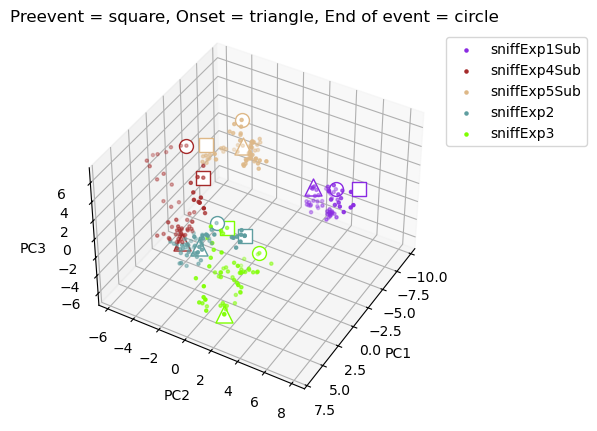

{'raw data':               24_nov_p1_merged.rec  24_nov_p1_merged.rec  \
 sniffExp1Sub             16.888889              6.222222   
 sniffExp1Sub             16.444444              5.777778   
 sniffExp1Sub             16.444444              5.777778   
 sniffExp1Sub             15.555556              5.629630   
 sniffExp1Sub             15.259259              5.777778   
 ...                            ...                   ...   
 sniffExp3                11.238095              6.095238   
 sniffExp3                11.809524              6.476190   
 sniffExp3                12.380952              6.666667   
 sniffExp3                12.000000              6.857143   
 sniffExp3                12.761905              6.476190   
 
               24_nov_p1_merged.rec  24_nov_p1_merged.rec  \
 sniffExp1Sub             25.777778              8.888889   
 sniffExp1Sub             25.481481              8.740741   
 sniffExp1Sub             25.037037              9.333333   
 sniffExp1

In [103]:
#if you didn't initialize subjects or dictionaries or if keys across dictionaries did not match then you would get a different message instead
#of "All set ot analyze"

testerAnalysis.PCA_trajectories(2, 1, 0, d=3, elev = 40)

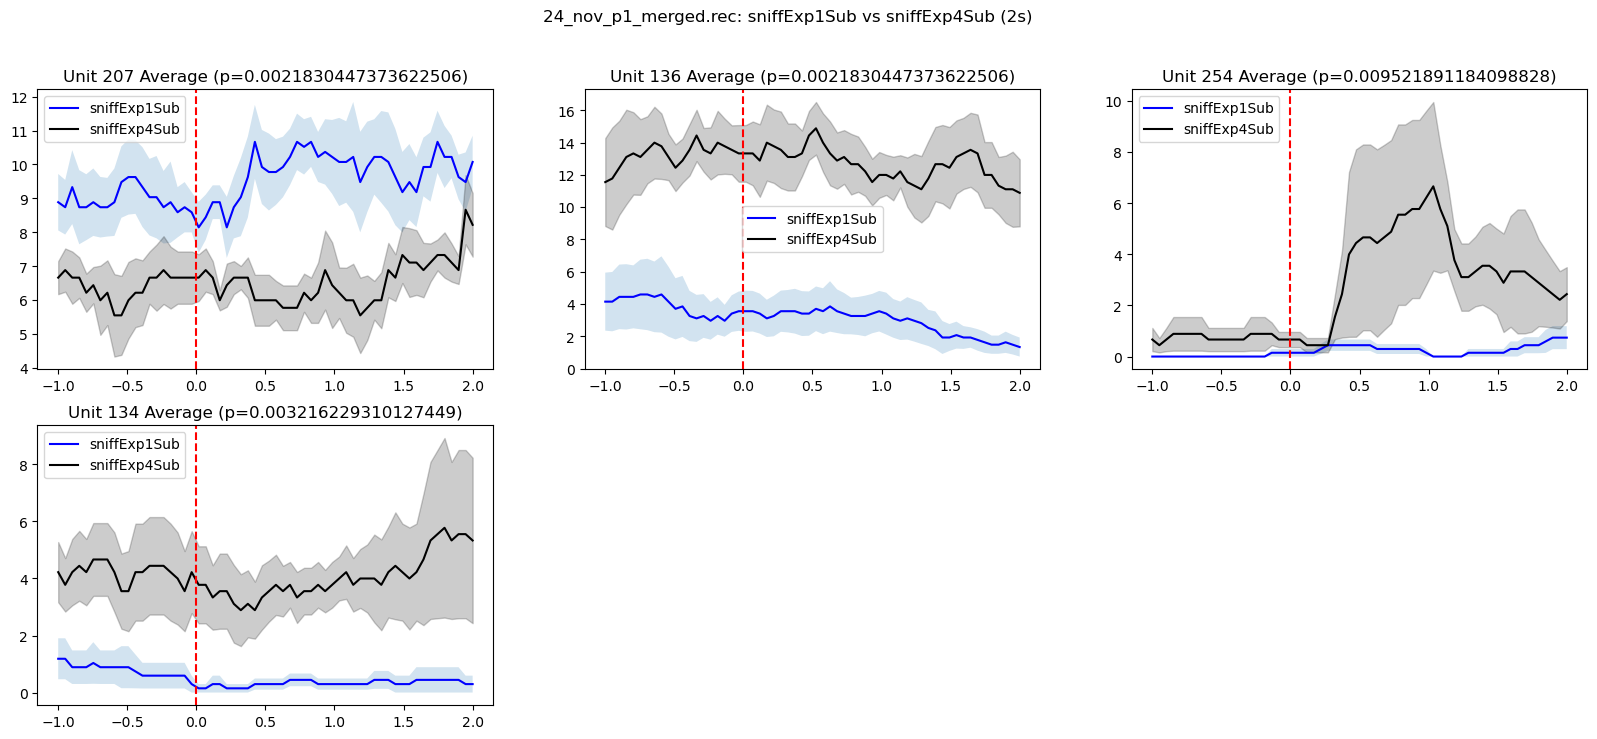

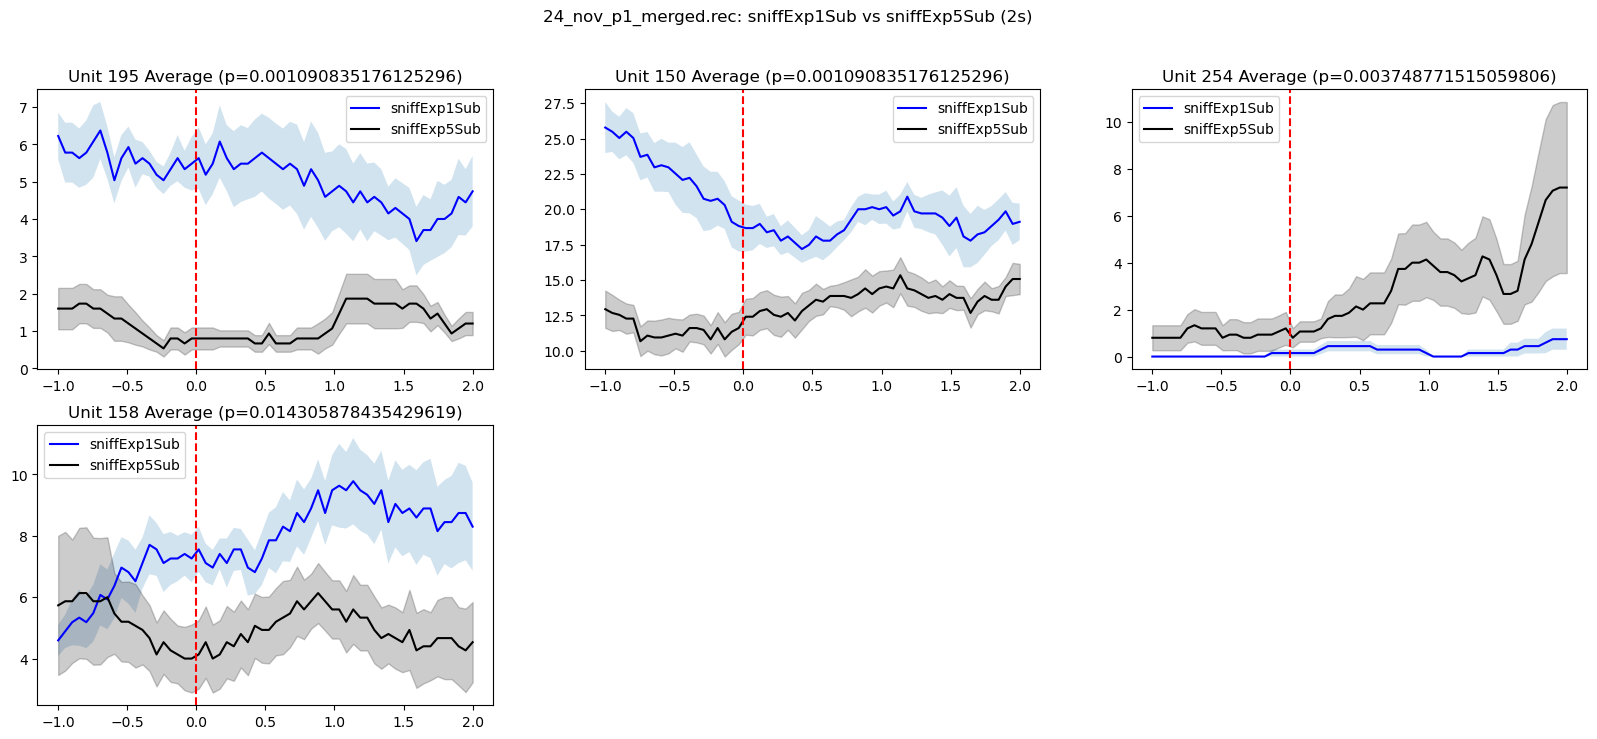

In [101]:
testerAnalysis.wilcox_event_v_event_collection('sniffExp1Sub', 'sniffExp4Sub', 2, 1)
testerAnalysis.wilcox_event_v_event_collection('sniffExp1Sub', 'sniffExp5Sub', 2, 1)

In [111]:
len(tester.collection['24_nov_p1_merged.rec'].unit_spiketrains.keys())


10

In [112]:
tester.collection['24_nov_p1_merged.rec'].freq_dict

{166: 20.558064584806726,
 195: 5.206141085441125,
 150: 17.790994191650608,
 207: 8.782106574235097,
 154: 0.35106217983860577,
 136: 5.055807889208534,
 254: 0.9788741072872074,
 127: 2.588976805573757,
 181: 0.6342181716062404,
 158: 3.935569327509431,
 260: 0.18620816351536756,
 134: 3.060476375575972}

In [105]:
testerAnalysis.__get_unit_event_firing_rates__(tester.collection['24_nov_p1_merged.rec'],'sniffExp1Sub', 2)


{166: [array([21.33333333, 21.33333333, 20.        , 21.33333333, 21.33333333,
         18.66666667, 14.66666667, 13.33333333, 14.66666667, 13.33333333,
         14.66666667, 13.33333333, 12.        , 13.33333333, 16.        ,
         17.33333333, 17.33333333, 18.66666667, 18.66666667, 17.33333333,
         18.66666667, 18.66666667, 18.66666667, 18.66666667, 18.66666667,
         18.66666667, 20.        , 20.        , 18.66666667, 17.33333333,
         16.        , 14.66666667, 13.33333333, 16.        , 17.33333333,
         17.33333333, 16.        , 17.33333333, 17.33333333, 18.66666667]),
  array([13.33333333, 13.33333333, 14.66666667, 13.33333333, 13.33333333,
         12.        , 10.66666667, 10.66666667, 12.        , 10.66666667,
         12.        , 12.        , 12.        , 13.33333333, 13.33333333,
         13.33333333, 13.33333333, 13.33333333, 14.66666667, 16.        ,
         17.33333333, 17.33333333, 17.33333333, 16.        , 16.        ,
         14.66666667, 14.666666

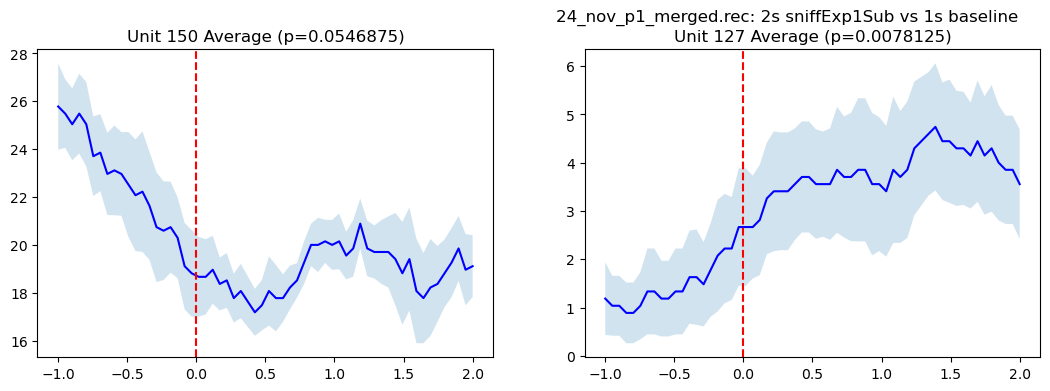

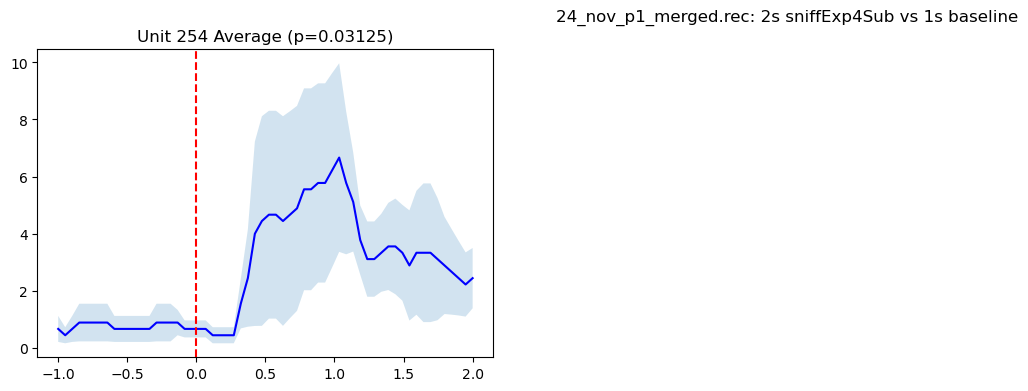

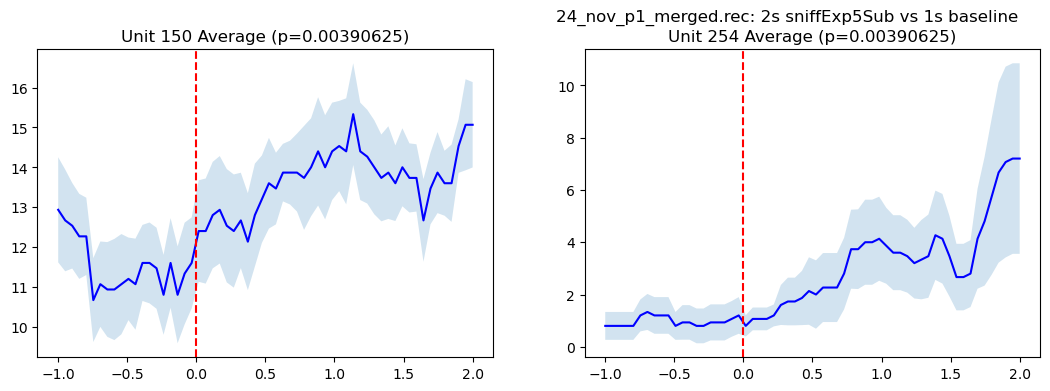

,original unit id,Wilcoxon Stat,p value,event1 vs event2,Recording,Subject,Event
0,166,17.0,0.322266,not significant,24_nov_p1_merged.rec,2.4,2s sniffExp5Sub vs 1s baseline
1,195,26.5,0.921875,not significant,24_nov_p1_merged.rec,2.4,2s sniffExp5Sub vs 1s baseline
2,150,1.0,0.003906,increases,24_nov_p1_merged.rec,2.4,2s sniffExp5Sub vs 1s baseline
3,207,13.0,0.160156,not significant,24_nov_p1_merged.rec,2.4,2s sniffExp5Sub vs 1s baseline
4,136,10.0,0.083984,not significant,24_nov_p1_merged.rec,2.4,2s sniffExp5Sub vs 1s baseline
5,254,0.0,0.003906,decreases,24_nov_p1_merged.rec,2.4,2s sniffExp5Sub vs 1s baseline
6,127,1.0,0.125000,not significant,24_nov_p1_merged.rec,2.4,2s sniffExp5Sub vs 1s baseline
7,181,12.0,0.812500,not significant,24_nov_p1_merged.rec,2.4,2s sniffExp5Sub vs 1s baseline
8,158,25.0,0.845703,not significant,24_nov_p1_merged.rec,2.4,2s sniffExp5Sub vs 1s baseline
9,134,24.0,0.769531,not significant,24_nov_p1_merged.rec,2.4,2s sniffExp5Sub vs 1s baseline


In [108]:
testerAnalysis.wilcox_baseline_v_event_collection('sniffExp1Sub', 2, 1)
testerAnalysis.wilcox_baseline_v_event_collection('sniffExp4Sub', 2, 1)
testerAnalysis.wilcox_baseline_v_event_collection('sniffExp5Sub', 2, 1)

In [ ]:
testerAnalysis.